In [2]:
# Competition Titanic on Kaggle (for beginners)

# BUT : prédire qui va survivre et qui va mourir
# 3 datasets (train, test, gender_submission)

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt
%matplotlib inline

df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
display(df_train.head(5), df_test.head(5))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df_test.isna().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
print("train :", df_train.duplicated().sum())
print("test :", df_test.duplicated().sum())

train : 0
test : 0


In [7]:
# on peut voir dans test que seul "survived" a été enlevé

# il y a des NaN, je veux savoir à quelle proportion du df ça correspond dans train et dans test
print("train :")
df_train.info()
df_train.describe()

print("test :")
df_test.info()
df_test.describe()

train :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
test :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64 

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
# TRAIN : 891 entrées / +600 NaN dans cabin / 177 NaN dans age / pas de doublons
#
# TEST : 418 entrées / +300 Nan dans cabin / 86 NaN dans age / pas de doublons

# dans un premier temps, je fais sauter la colonne cabin car elle comprend trop de NaN et je ne peux pas les remplacer par une
# quelconque valeur, ainsi que Name et Ticket
df_train = df_train.drop(["Cabin", "Name", "Ticket"], axis = 1)
df_test = df_test.drop(["Cabin", "Name", "Ticket"], axis = 1)


In [9]:
display(df_train.head(5))
display(df_test.head(5))

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [10]:
# je modifie en variables numériques les colonnes sex et embarked
dico = {"male":0, "female":1, "S":0, "C":1, "Q":2}

df_train = df_train.replace(dico)
df_test = df_test.replace(dico)

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 62.8 KB


In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


<AxesSubplot:>

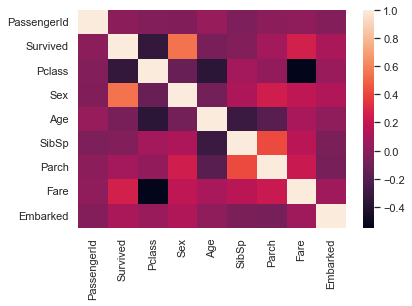

In [11]:
# en ce qui concerne l'âge, je veux voir si ça a une influence avant de faire quoique ce soit
# je vais donc faire une matrice de corrélation heatmap

# TRAIN
df_train_corr = df_train.corr()
sns.heatmap(df_train_corr)

# on peut voir pour TRAIN que Survived est anti-corrélée avec Pclass et Age (donc plus le numéro de la classe est bas, plus survived
# augmente, et plus l'âge est bas, et plus survived augmente) --> logique car 1e classe + prestigieuse que 2e et 3e
# --> et enfants privilégiés lors d'évacuations
# il semblerait en revanche qu'il n'y ait pas de corrélation entre Survived et SibSp, à vérifier

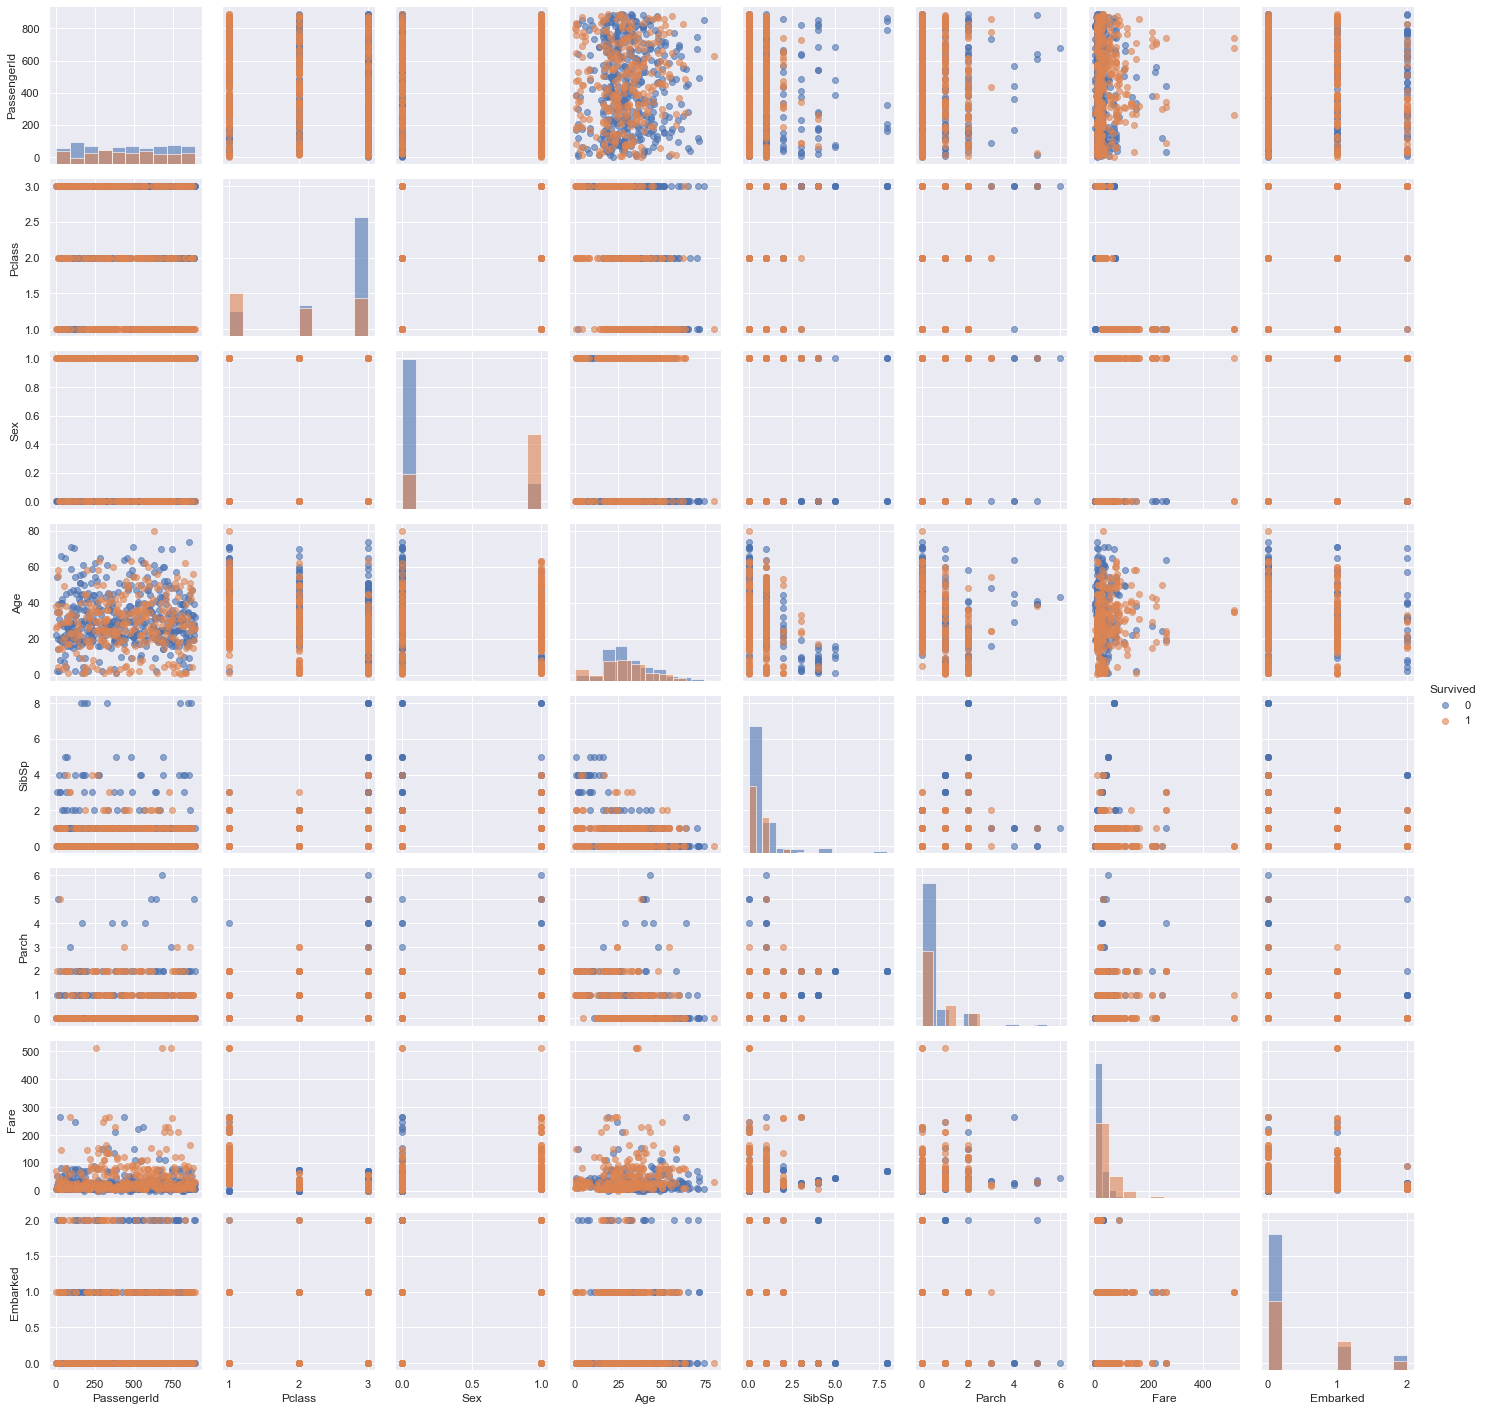

In [12]:
# j'observe les relations entre les variables avec un pairplot
g = sns.PairGrid(df_train, hue = "Survived")
g.map_diag(plt.hist, alpha = 0.6)
g.map_offdiag(plt.scatter, alpha = 0.6)
g.add_legend()

# sur ce pairgrid on remarque :
# que Pclass conditionne énormément l'issue : ratio de survivants positif pour la 1e classe, neutre pour la 2e, négatif +++ pour la 3e
# idem pour Sex : ratio de survivants négatif +++ chez les hommes (0), positif chez les femmes (1)
# idem pour SibSp : plus le passager avait de frères/soeurs/époux/se dans le navire, plus il avait de risque de mourir
# idem parch : plus le passager avait de parents/enfants dans le navire, plus il avait de risque de mourir
# idem fare : plus le prix du ticket était bas, et plus il y avait de risque de mourir
# et embarked : il semble y avoir aussi un lien entre survivant et port d'embarquement. ratio survivant/mort positif pour Cherbourg (1)
# il y a aussi un fort déséquilibre entre le nombre total de survivants qui est beaucoup plus faible que celui des morts

# de plus, j'ai l'impression d'avoir une valeur aberrante à Fare (prix qui monte à 500 ???)

In [13]:
# vérification des valeurs aberrantes de Fare
verif = df_train[df_train["Fare"] > 300]
print(verif)

# ces trois passagers sont en première classe et ont payé le même prix, il faut croire que ce n'est pas une erreur

     PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch      Fare  \
258          259         1       1    1  35.0      0      0  512.3292   
679          680         1       1    0  36.0      0      1  512.3292   
737          738         1       1    0  35.0      0      0  512.3292   

     Embarked  
258       1.0  
679       1.0  
737       1.0  


C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


Text(0.5, 0.98, 'link between chance of surviving and age')

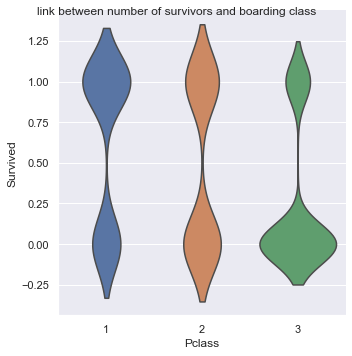

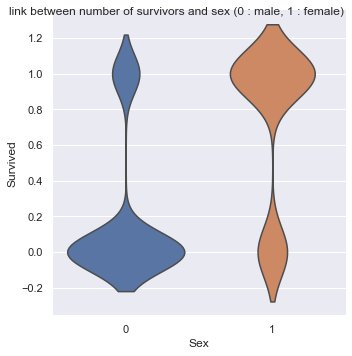

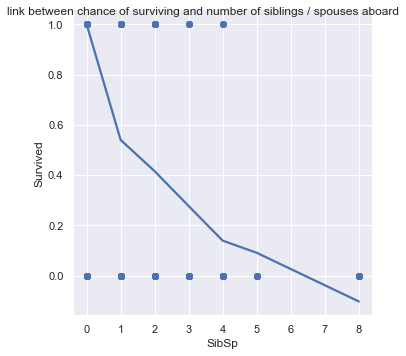

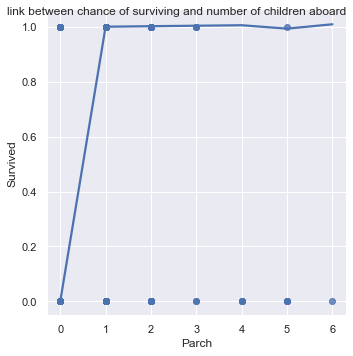

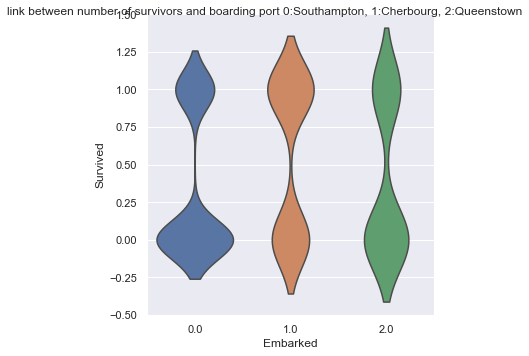

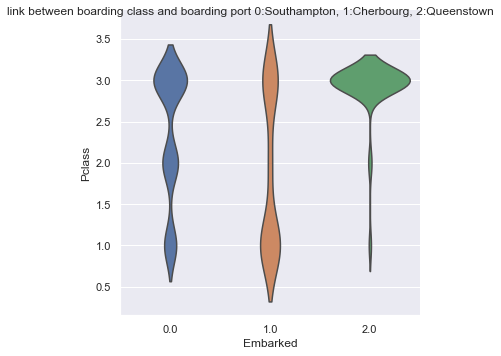

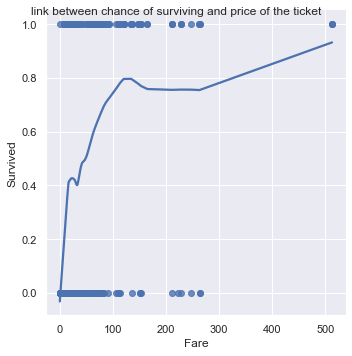

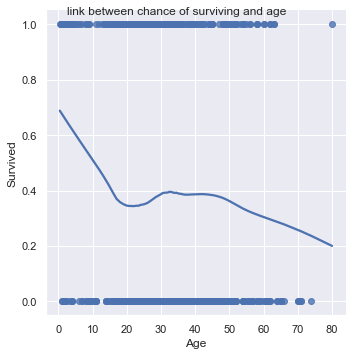

In [14]:
# au vue des résultats du pair grid, je souhaite examiner plus en détail certaines relations entre les données
# j'affiche en détail le rapport survivant en fonction de la classe (lien entre Pclass et Survived)
g1 = sns.catplot(data = df_train, x = "Pclass", y = "Survived", kind = "violin", inner = None)
g1.fig.suptitle("link between number of survivors and boarding class")

# lien entre Sex et Survived
g2 = sns.catplot(data = df_train, x = "Sex", y = "Survived", kind = "violin", inner = None)
g2.fig.suptitle("link between number of survivors and sex (0 : male, 1 : female)")

# lien entre SibSp et Survived
g3 = sns.lmplot(x = "SibSp", y = "Survived", data = df_train, lowess = True)
g3.fig.suptitle("link between chance of surviving and number of siblings / spouses aboard")

# lien entre Parch et Survived
g4 = sns.lmplot(x = "Parch", y = "Survived", data = df_train, lowess = True)
g4.fig.suptitle("link between chance of surviving and number of children aboard")

# lien entre Embarked et Survived
g5 = sns.catplot(data = df_train, x = "Embarked", y = "Survived", kind = "violin", inner = None)
g5.fig.suptitle("link between number of survivors and boarding port 0:Southampton, 1:Cherbourg, 2:Queenstown")
# en fait, il est ici intéressant de voir quelle type de clientèle a embarqué à quel port
g5bis = sns.catplot(data = df_train, x = "Embarked", y = "Pclass", kind = "violin", inner = None)
g5bis.fig.suptitle("link between boarding class and boarding port 0:Southampton, 1:Cherbourg, 2:Queenstown")

# lien entre Fare et Survived
g6 = sns.lmplot(x = "Fare", y = "Survived", data = df_train, lowess = True)
g6.fig.suptitle("link between chance of surviving and price of the ticket")

# lien entre Age et Survived
g7 = sns.lmplot(x = "Age", y = "Survived", data = df_train, lowess = True)
g7.fig.suptitle("link between chance of surviving and age")

In [15]:
### INTERPRETATION DES GRAPHIQUES ###

# on remarque que ce qui favorise les chances de survie sont :
    # la 1e classe
    # être une femme ayant entre 0 et 15 ans, et entre 30 et 50 ans (et avoir IMPERATIVEMENT un enfant < 15 ans)
    # être un enfant < 15 ans
    # être seul ou accompagné d'un seul frère/soeur/époux(se)
    # avoir embarqué à Cherbourg
    # avoir payé son ticket plus de 100 dollars

# conclusion assez généralisée : pour avoir le maximum de chances de survie il faut être un enfant < 15 ans sans ou avec un seul
# frère/soeur ou une femme entre 30 et 50 ans et ayant au moins un enfant, 
# avoir embarqué à Cherbourg en 1e classe avec un ticket valant 100 $ et +


0    0.616162
1    0.383838
Name: Survived, dtype: float64


C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


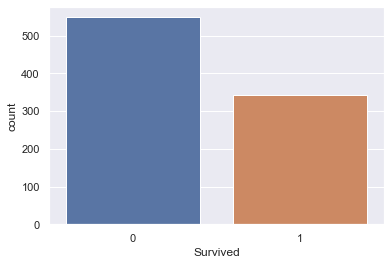

In [16]:
# DATA VIZ
# je souhaite connaître la proportion de Survived dans train car si déséquilibré : besoin d'un over/under sampling
sns.countplot(df_train["Survived"])

print(df_train["Survived"].value_counts(normalize = True))

In [17]:
# jeu de données déséquilibré : avec un algorithme standard on aurait une accuracy de seulement 38%
# il va falloir rééquilibrer les données

In [12]:
# pour âge : 177*100/891 = 19,8 % des données soit 1 cinquième ce qui n'est pas négligeable.
# Je ne peux pas supprimer cette variable car on perdrait trop de données
# je remplace les NaN de âge avec la valeur précédente (j'ai peur que la moyenne des âges uniformise trop les données)

df_train = df_train.fillna(method = "ffill")
df_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [13]:
# il faut aussi que je modifie les NaN de df_test["Age"]
# j'utilise la même méthode que pour train pour éviter de trop uniformiser les données
df_test = df_test.fillna(method = "ffill")
df_test.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [14]:
# je sépare X_train, X_test, y_train, y_test 
X_train = df_train.drop("Survived", axis = 1)
X_test = df_test
y_train = df_train["Survived"]

In [15]:
# je vérifie les dimensions car scikit-learn ne veut que des 2D de la forme (xx,1) et non pas (xx,)
print("dimensions de X_train :", X_train.shape)
print("dimensions de X_test :", X_test.shape)
print("dimensions de y_train :", y_train.shape)

dimensions de X_train : (891, 8)
dimensions de X_test : (418, 8)
dimensions de y_train : (891,)


In [16]:
# je modifie les dimensions de y_train pour être conforme avec scikit-learn
# pour cela, je change tout en array
X_train_array = X_train.to_numpy()
X_test_array = X_test.to_numpy()
y_train_array = y_train.to_numpy()

# puis j'effectue le redimensionnement
y_train_array = y_train_array.reshape((len(y_train_array),1))

print("dimensions de X_train_array :", X_train_array.shape)
print("dimensions de X_test_array :", X_test_array.shape)
print("dimensions de y_train_array :", y_train_array.shape)

dimensions de X_train_array : (891, 8)
dimensions de X_test_array : (418, 8)
dimensions de y_train_array : (891, 1)


In [17]:
# ce sont les modèles de régression qui sont le plus appropriés dans notre cas : je vais tester logistic regression
# deux régressions linéaires régularisées : Lasso et Ridge
# et le support vector regression

# je commence par chercher les meilleurs paramètres

# grid search cv + over sampling

# oversampling + je lance grid search cv

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_resample(X_train_array, y_train_array)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# logistic regression
logreg1 = LogisticRegression(max_iter = 1000)
params_logreg = {"C":[1, 10, 100],"solver":["liblinear","lbfgs"]}

grid = GridSearchCV(estimator = logreg1, param_grid = params_logreg)
grid.fit(X_train_ros, y_train_ros)
best_parameters = grid.best_params_
print("best parameters for logistic regression :", best_parameters)



best parameters for logistic regression : {'C': 100, 'solver': 'lbfgs'}


In [24]:
logreg = LogisticRegression(max_iter = 1000, C = 100, solver = "lbfgs")
logreg.fit(X_train_ros, y_train_ros)
print("accuracy train with logistic regression", logreg.score(X_train_ros, y_train_ros))

accuracy train with logistic regression 0.7932604735883424


meilleur alpha lasso : 0.0001 accuracy train de lasso : 0.3854652266124492


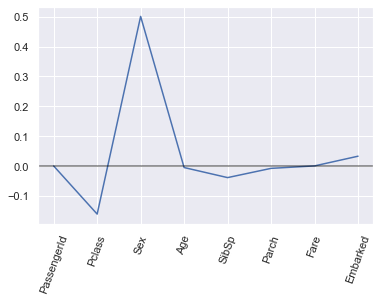

In [25]:
# je cherche les meilleurs paramètres de Lasso

# réinitialisation des données
ros = RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_resample(X_train_array, y_train_array)

# Lasso

from sklearn.linear_model import LassoCV, RidgeCV

alphas = [0.0001, 0.001,0.01,0.1,1,10,100]
lasso1 = LassoCV(alphas = alphas)
lasso1.fit(X_train_ros, y_train_ros)
print("meilleur alpha lasso :", lasso1.alpha_, "accuracy train de lasso :", lasso1.score(X_train_ros, y_train_ros))

# j'affiche les coefficients renvoyés par Lasso pour chaque colonne
plt.figure()
plt.plot(range(len(X_train.columns)), lasso1.coef_)
plt.xticks(range(len(X_train.columns)), X_train.columns.values, rotation = 70)
plt.axhline(y=0, color = "black", alpha = 0.5)
plt.show()

# on voit sur le graphique que les variables sélectionnées par Lasso sont au nombre de 4 sur 8
# ce sont : pclass, sex, sibsp, (parch?), et embarked
# ce n'est pas suffisant pour avoir un bon modèle, et c'est d'ailleurs ce que renvoie l'accuracy


In [26]:
# je cherche les meilleurs paramètres de Ridge

# réinitialisation des données
ros = RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_resample(X_train_array, y_train_array)

# Ridge
ridge1 = RidgeCV(alphas = (0.001,0.01,0.1,1,10,100))
ridge1.fit(X_train_ros, y_train_ros)
print("meilleur alpha ridge :", ridge1.alpha_, "accuracy train de ridge :", ridge1.score(X_train_ros, y_train_ros))

# nous n'obtenons donc pas de résultat avec les régressions linéaires régularisées


meilleur alpha ridge : 1.0 accuracy train de ridge : 0.37707859348223915


In [27]:
# j'essaie le support vector regression : SVR

# réinitialisation des données
ros = RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_resample(X_train_array, y_train_array)

from sklearn.svm import SVR

# support vector regression (SVR)
svr1 = SVR(max_iter = -1)
params_svr = {"kernel":["linear", "poly", "rbf"]}

grid = GridSearchCV(estimator = svr1, param_grid = params_svr)
grid.fit(X_train_ros, y_train_ros)
best_parameters = grid.best_params_
print("best parameters for SVR :", best_parameters)


best parameters for SVR : {'kernel': 'linear'}


In [28]:
from sklearn.svm import SVR

# réinitialisation des données
ros = RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_resample(X_train_array, y_train_array)

svr = SVR(max_iter = -1, kernel = "linear")
svr.fit(X_train_ros, y_train_ros)
print("accuracy train with SVR", svr.score(X_train_ros, y_train_ros))

accuracy train with SVR 0.2837379590412452


In [25]:
# il semble que le mieux soit logistic regression
# je prédis test avec
y_test_pred = logreg.predict(X_test_array)

df_test["Survived"] = y_test_pred
display(df_test.head(20))

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,892,3,0,34.5,0,0,7.8292,2,0
1,893,3,1,47.0,1,0,7.0000,0,0
2,894,2,0,62.0,0,0,9.6875,2,0
3,895,3,0,27.0,0,0,8.6625,0,0
4,896,3,1,22.0,1,1,12.2875,0,1
5,897,3,0,14.0,0,0,9.2250,0,0
6,898,3,1,30.0,0,0,7.6292,2,1
7,899,2,0,26.0,1,1,29.0000,0,0
8,900,3,1,18.0,0,0,7.2292,1,1
9,901,3,0,21.0,2,0,24.1500,0,0


C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


Text(0.5, 0.98, 'TEST DATASET, link between chance of surviving and age')

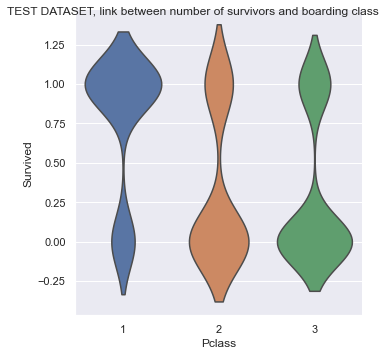

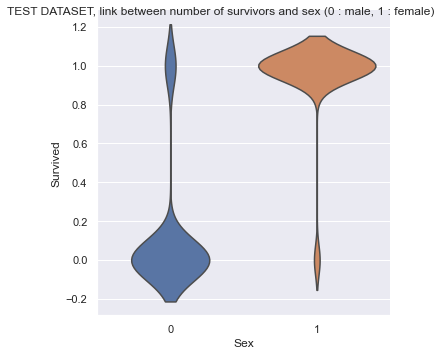

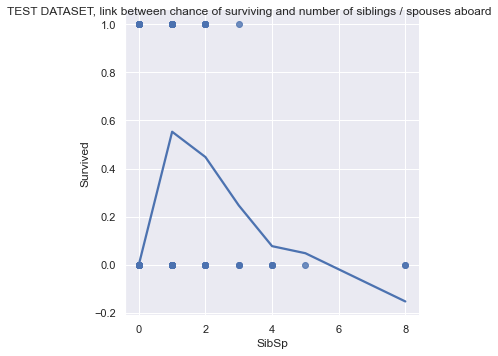

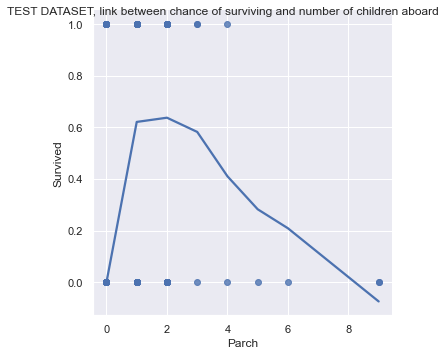

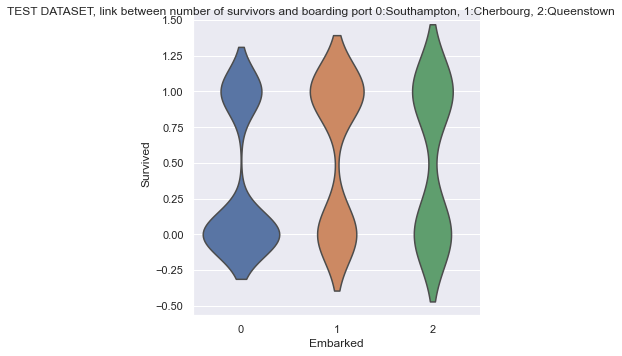

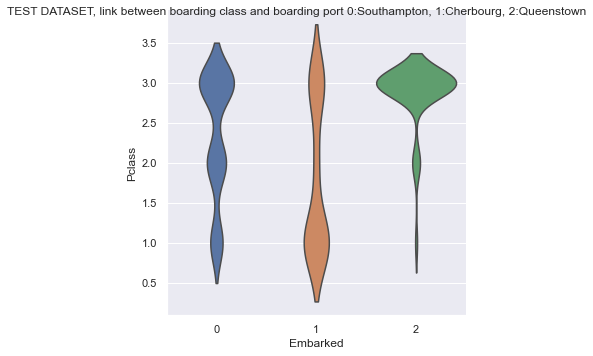

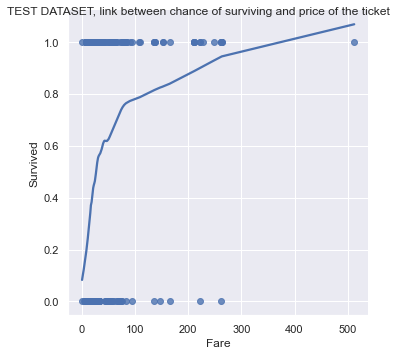

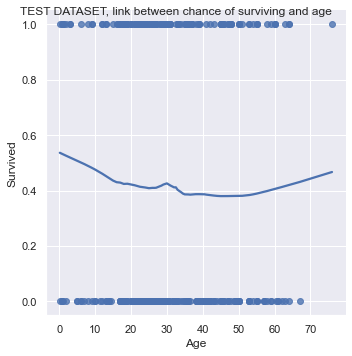

In [26]:
# je trace les graphiques des résultats de la logistic regression pour vérifier les résultats
# nous avons déjà vu que l'accuracy sur train avec logreg est de 79%

g15 = sns.catplot(data = df_test, x = "Pclass", y = "Survived", kind = "violin", inner = None)
g15.fig.suptitle("TEST DATASET, link between number of survivors and boarding class")

# lien entre Sex et Survived
g25 = sns.catplot(data = df_test, x = "Sex", y = "Survived", kind = "violin", inner = None)
g25.fig.suptitle("TEST DATASET, link between number of survivors and sex (0 : male, 1 : female)")

# lien entre SibSp et Survived
g35 = sns.lmplot(x = "SibSp", y = "Survived", data = df_test, lowess = True)
g35.fig.suptitle("TEST DATASET, link between chance of surviving and number of siblings / spouses aboard")

# lien entre Parch et Survived
g45 = sns.lmplot(x = "Parch", y = "Survived", data = df_test, lowess = True)
g45.fig.suptitle("TEST DATASET, link between chance of surviving and number of children aboard")

# lien entre Embarked et Survived
g55 = sns.catplot(data = df_test, x = "Embarked", y = "Survived", kind = "violin", inner = None)
g55.fig.suptitle("TEST DATASET, link between number of survivors and boarding port 0:Southampton, 1:Cherbourg, 2:Queenstown")
# lien entre Embarked et Pclass
g55bis = sns.catplot(data = df_test, x = "Embarked", y = "Pclass", kind = "violin", inner = None)
g55bis.fig.suptitle("TEST DATASET, link between boarding class and boarding port 0:Southampton, 1:Cherbourg, 2:Queenstown")

# lien entre Fare et Survived
g65 = sns.lmplot(x = "Fare", y = "Survived", data = df_test, lowess = True)
g65.fig.suptitle("TEST DATASET, link between chance of surviving and price of the ticket")

# lien entre Age et Survived
g75 = sns.lmplot(x = "Age", y = "Survived", data = df_test, lowess = True)
g75.fig.suptitle("TEST DATASET, link between chance of surviving and age")